In [10]:
import sys
sys.path.insert(0, "../")

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mcfa import (mcfa, mpl_utils)

%matplotlib inline

In [2]:
# Load the Iris data.
X = load_iris().data

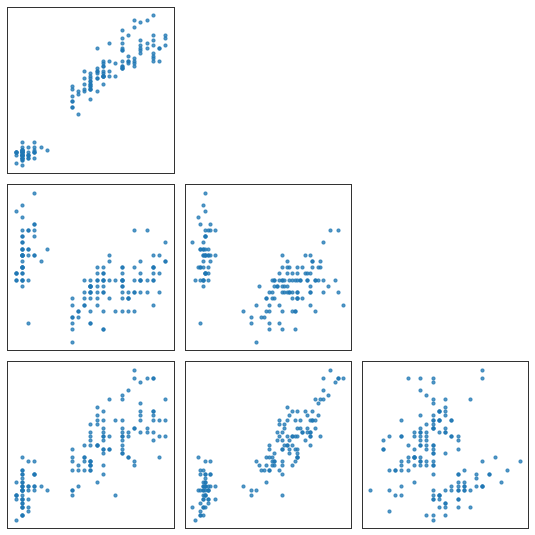

In [3]:
# Plot the data as a corner plot.
fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10))

In [4]:
model = mcfa.MCFA(n_components=3, n_latent_factors=2)
model.fit(X)

In [5]:
for parameter_name, value in dict(zip(model.parameter_names, model.theta_)).items():
    print("{}: {}\n{}".format(parameter_name, value.shape, value))

pi: (3,)
[0.36399391 0.33333333 0.30267275]
A: (4, 2)
[[-0.75194646 -0.28528073]
 [-0.38136103 -0.54160828]
 [-0.51117789  0.71028414]
 [-0.16684561  0.3475224 ]]
xi: (2, 3)
[[-9.15954704 -5.8569331  -7.90745346]
 [ 1.12224502 -2.15207027  0.24402702]]
omega: (2, 2, 3)
[[[ 0.66819626  0.12438314  0.46265433]
  [-0.15816205  0.06155728 -0.08177194]]

 [[-0.15816205  0.06155728 -0.08177194]
  [ 0.05097388  0.03625504  0.01542471]]]
psi: (4, 4)
[[0.06476716 0.         0.         0.        ]
 [0.         0.06893093 0.         0.        ]
 [0.         0.         0.02411866 0.        ]
 [0.         0.         0.         0.0384468 ]]


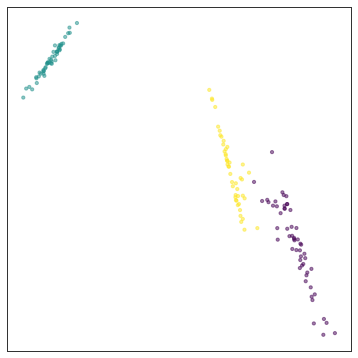

In [6]:
# Plot the estimated posterior factor scores.
#fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10))
v, v_cluster, v_mean = model.factor_scores(X)

# Associations
hard_associations = np.argmax(model.tau_, axis=1)

fig = mpl_utils.corner_scatter(v_mean, c=hard_associations, figsize=(10, 10), s=10)

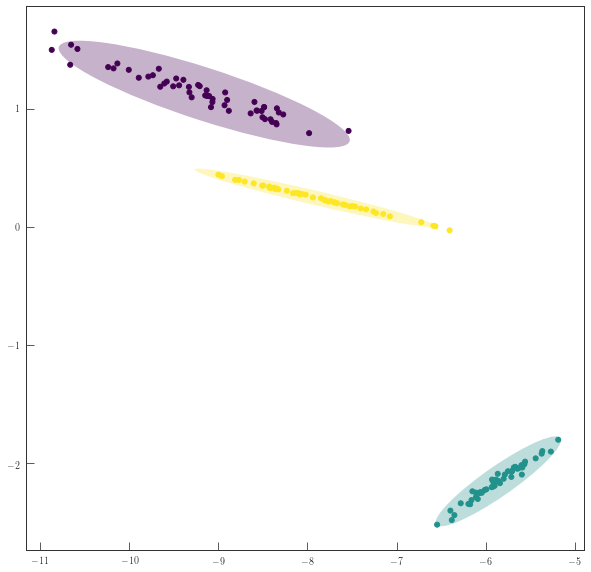

In [65]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots(figsize=(10, 10))
scat = ax.scatter(v_cluster.T[0], v_cluster.T[1],
                  c=hard_associations, vmin=0, vmax=2)

cmap = scat.get_cmap()

mus = model.theta_[model.parameter_names.index("xi")]
covs = model.theta_[model.parameter_names.index("omega")]

for i, (mu, cov) in enumerate(zip(mus.T, covs.T)):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    
    width, height = 2.0 * 2 * np.sqrt(vals)
    ellipse = Ellipse(xy=mu, width=width, height=height, angle=theta,
                      facecolor=scat.to_rgba(i), zorder=-1, alpha=0.3)
    ax.add_artist(ellipse)


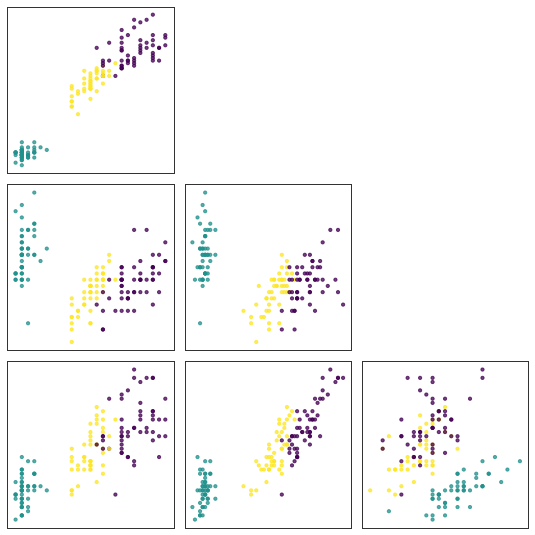

In [66]:
# Plot the clustering in data space.
fig = mpl_utils.corner_scatter(X, s=10, alpha=0.75, figsize=(10, 10), c=hard_associations)

(4, 2)

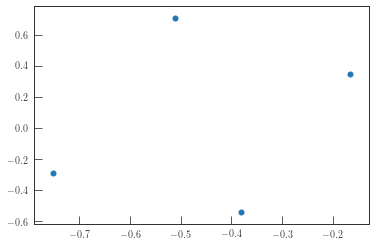

In [70]:
# Plot the factor loads.
A = model.theta_[model.parameter_names.index("A")]
fig, ax = plt.subplots()
ax.scatter(A.T[0], A.T[1])
model.theta_[1].shape


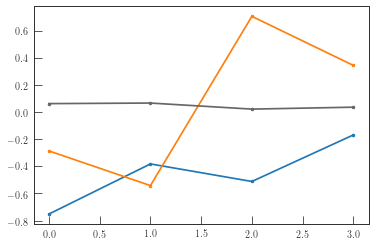

In [73]:
fig, ax = plt.subplots()
for i in range(model.n_latent_factors):
    ax.plot(A.T[i])

psi = np.diag(model.theta_[model.parameter_names.index("psi")])
ax.plot(psi, c="#666666")